# Imports

In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
universe = G10_FX + [x for x in ASIA_FX if x != "USDCNH"]
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [3]:
settings = Settings(start_date = "2000-01-01", end_date = "2016-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

# Other Data

# Data integrity

<AxesSubplot:>

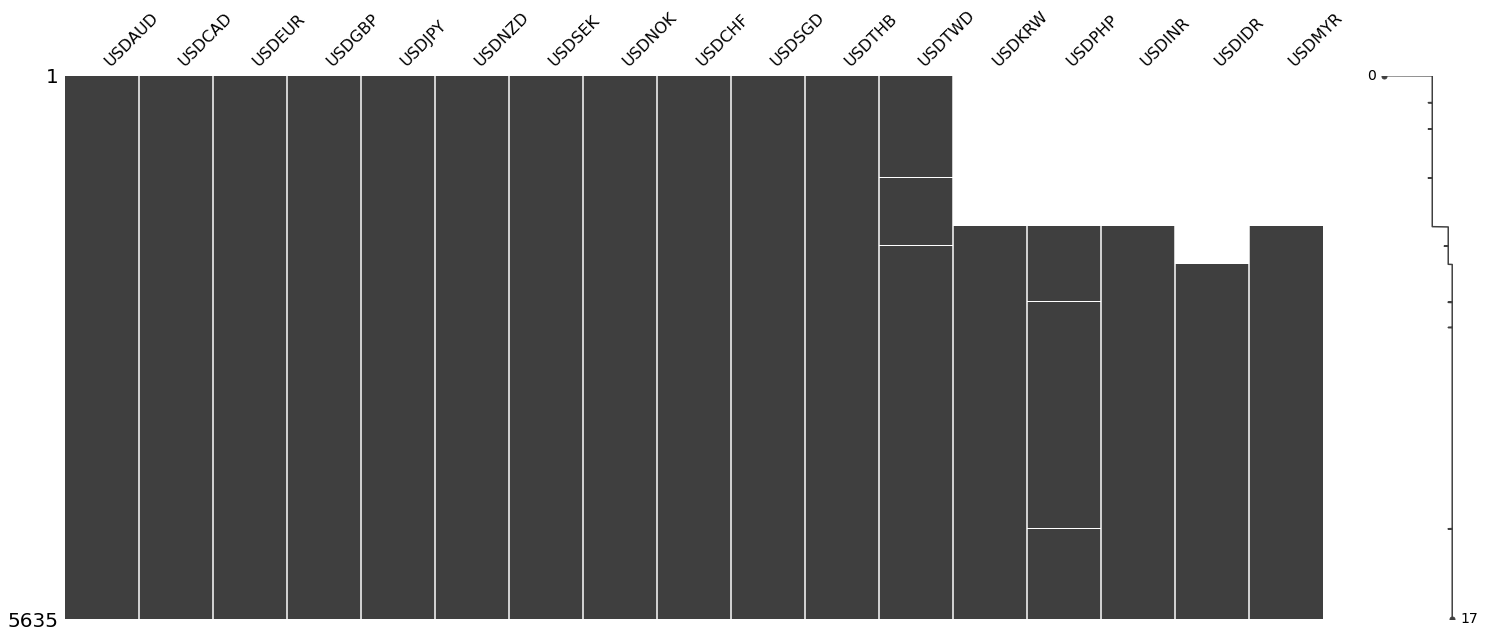

In [4]:
msmx(carry_returns)

<AxesSubplot:>

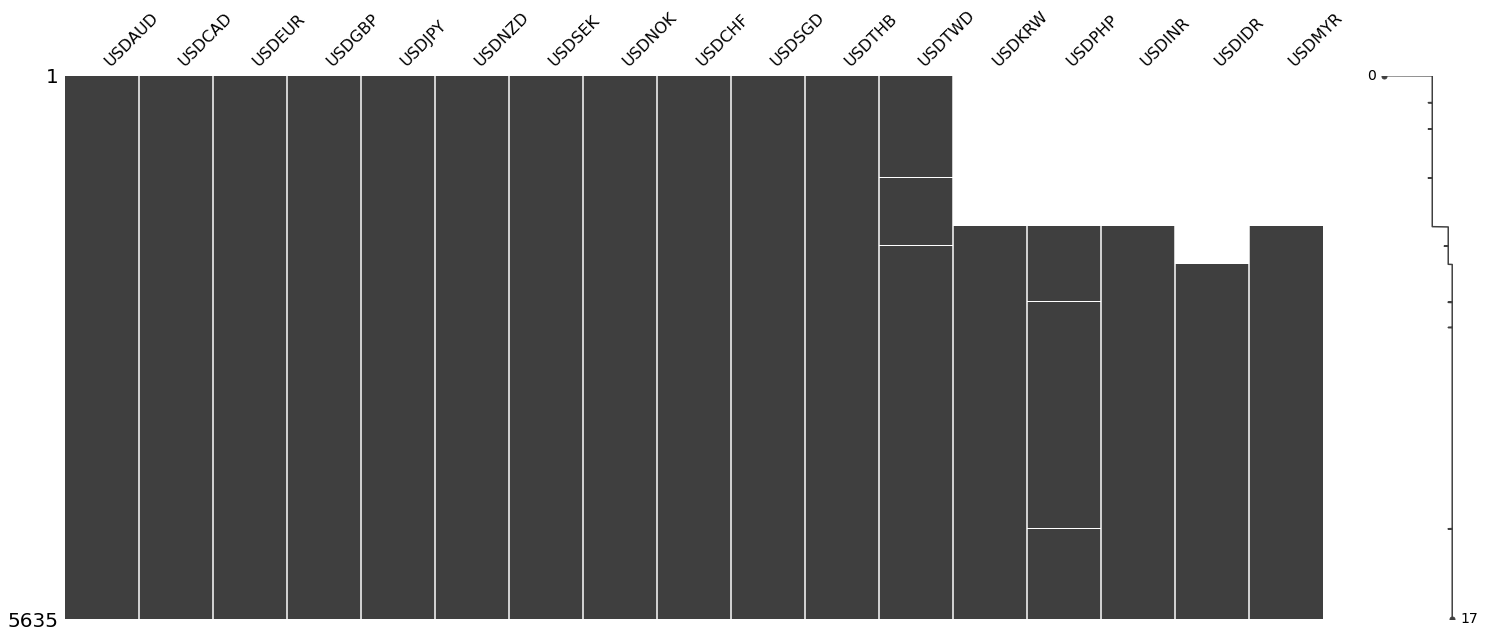

In [5]:
msmx(spot_returns)

# Signal

In [6]:
num = carry_returns.pipe(fill_date, True) ### historical returns from carry
denom = spot_returns.pipe(fill_date, True).pipe(rolling_vol, 21*3) ### volatility of spot returns
signal = (num/denom).pipe(omit_leading_na, "any").pipe(high_minus_low)
sig = signal * (1/spot_returns.pipe(fill_date, True).pipe(rolling_vol, 21*6)) ### magnitude is 1/vol

# Backtest Daily Rebal

## Use cov

In [7]:
daily_bt_cov = Backtest(signal = sig, 
                    asset_returns = total_returns, 
                    tcost = abs(total_returns*0), 
                    settings = settings,
                    settings_inject={"use_cov":True})
daily_bt_cov.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling (using cov-matrix)...


In [8]:
get_summary(daily_bt_cov)

Returns   : 0.0861856706070243
Vol       : 0.11540035025764812
SR        : 0.746840632758932
Max DD    : -30.29

C Returns : 0.08276913486076908
C SR      : 0.6845793274881008
C Max DD  : -26.71

Hit rate  : 0.531
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.13


In [9]:
get_returns_stats(daily_bt_cov.asset_rtn, daily_bt_cov.wts)

C:\Users\vin_s\National University of Singapore\FSP Dymon AY21 22 Term 1 - Documents\Codebase\01_Carry\..\genesis.py:797: RuntimeWarning: invalid value encountered in double_scalars
  return (ret - rf).mean() * np.sqrt(obs_per_year) / ret.std()


,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF,USDSGD,USDTHB,USDTWD,USDKRW,USDPHP,USDINR,USDIDR,USDMYR
annualized_return,0.325099,-0.258835,0.637982,0.723794,0.85802,0.860935,0.316798,0.515381,-0.40948,-1.827074,3.856933,1.454145,-0.005551,2.421617,0.139732,-0.065455,-0.05883
sharpe,0.200083,-0.164762,0.339972,0.391129,0.340682,0.52879,0.287296,0.43571,-0.200805,-0.390831,0.80163,0.209374,-0.003201,0.733115,0.042765,-0.017444,-0.023672
dollar_sharpe,0.191482,-0.170664,0.338429,0.376956,0.329179,0.488373,0.288129,0.418728,-0.220176,-0.424389,0.711635,0.192478,-0.013423,0.680654,0.017553,-0.03443,-0.0312
trade_sharpe,0.469106,0.075777,0.494595,0.141134,0.792797,0.804225,-0.030632,1.01402,-0.240704,-0.446642,1.415957,-0.27791,-0.532271,0.706361,-0.103598,-0.113307,-0.688483
long_sharpe,1.892279,0.241257,0.494595,-0.287719,0.860754,NaN,0.569802,3.447947,0.16201,-0.364109,-0.435255,-0.55358,0.196473,1.123052,0.923032,-0.285106,-0.800513
short_sharpe,0.435399,0.059113,NaN,0.732776,1.016563,0.808122,-0.253479,0.999539,-1.767231,-1.889009,1.543591,1.463757,-0.756058,0.591991,-0.147808,-0.102147,-0.652508
sortino,0.080858,-0.047909,0.17679,0.168925,0.201067,0.217408,0.096673,0.152751,-0.104554,-0.182954,0.457865,0.115351,-0.001116,0.385608,0.025888,-0.007906,-0.012676
max_drawdown,-4.391062,-10.819193,-7.77143,-8.81448,-6.475282,-5.515755,-3.782333,-4.139103,-14.636065,-38.436861,-10.824555,-22.647955,-6.942487,-5.6894,-15.379584,-13.240215,-8.944526
max_drawdown_start,2005-09-09,2004-02-17,2010-06-07,2008-11-14,2002-10-18,2005-03-18,2015-04-14,2003-05-29,2001-07-05,2001-07-13,2015-03-02,2004-08-17,2013-01-14,2015-03-02,2011-08-01,2008-08-22,2013-05-28
max_drawdown_end,2006-03-28,2014-06-10,2014-03-18,2012-04-12,2004-11-08,2006-03-28,2016-05-02,2011-04-19,2013-10-03,2013-03-12,2015-10-01,2004-12-31,2013-07-08,2015-12-11,2013-09-03,2008-11-20,2016-11-29


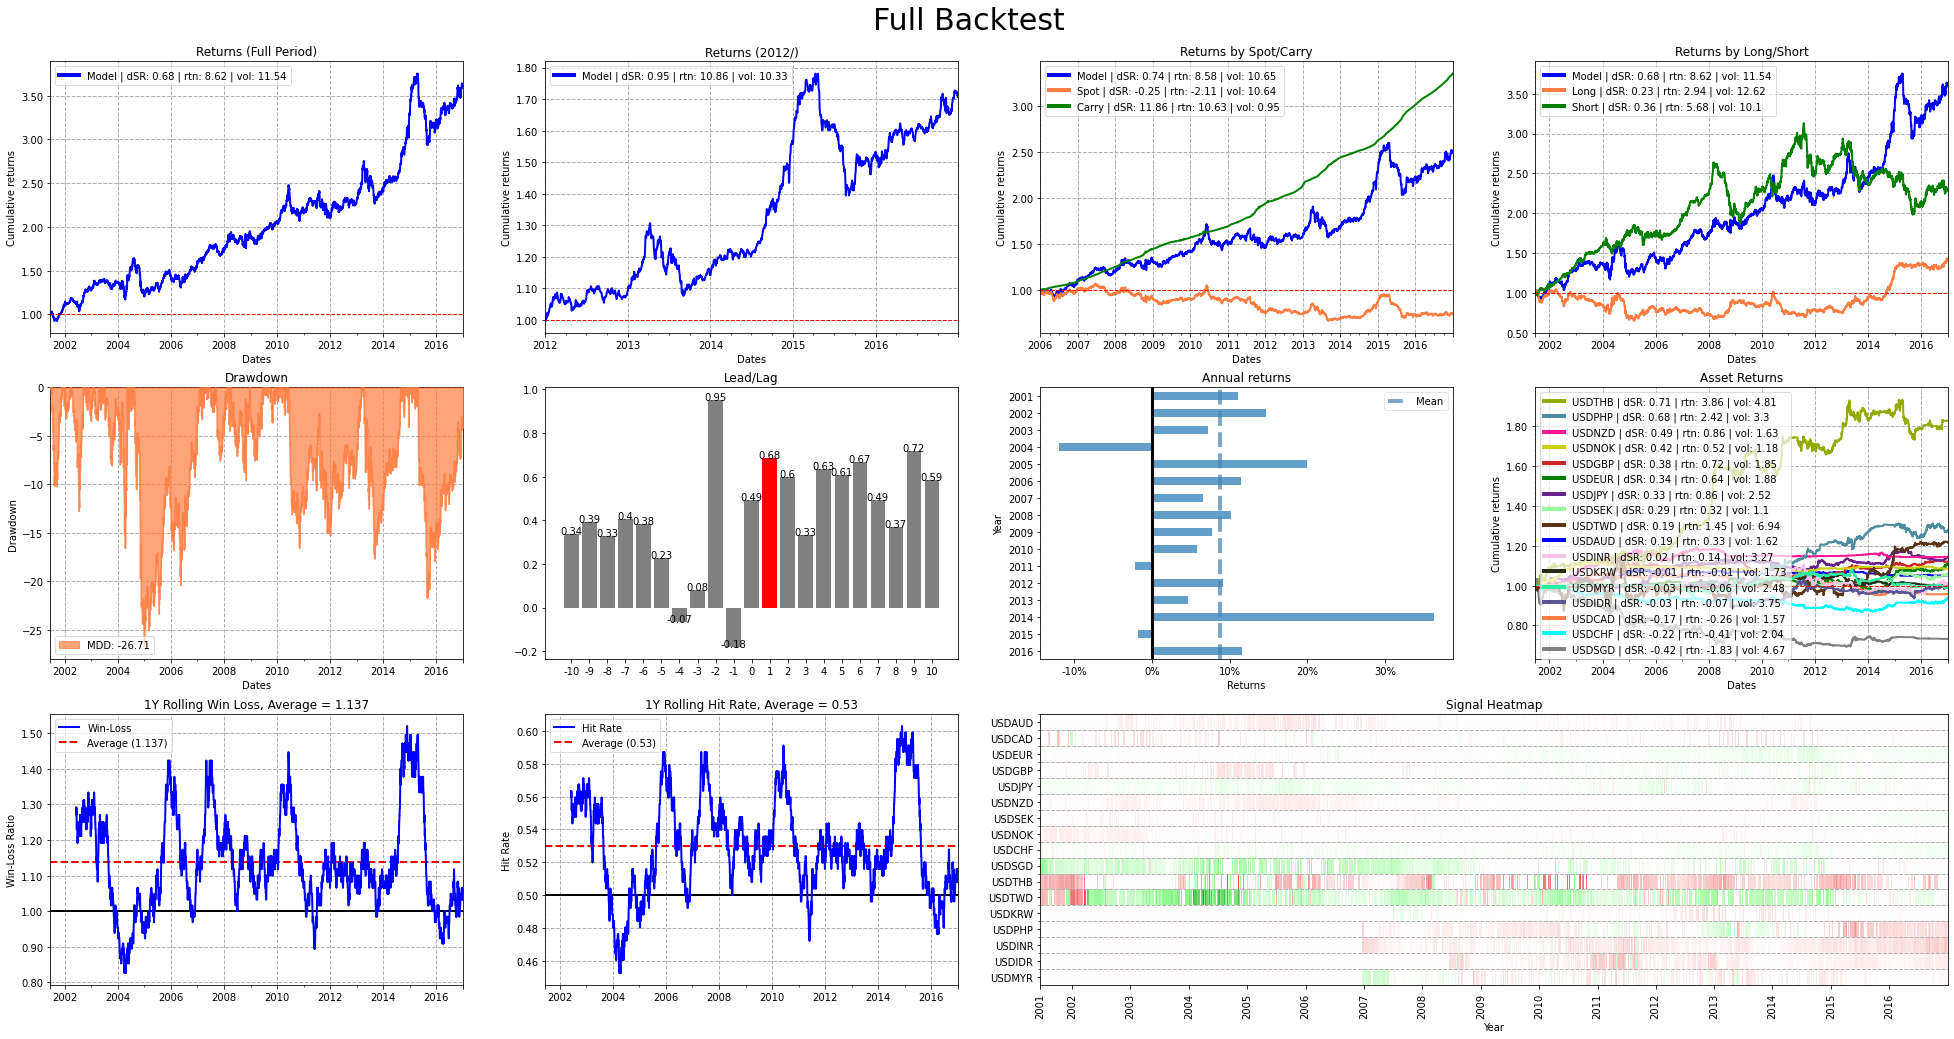

In [10]:
plot_bt(daily_bt_cov)

## Use scaler

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Returns   : 0.08948695833869037
Vol       : 0.10679129089482077
SR        : 0.8379612006640736
Max DD    : -26.72

C Returns : 0.08736832856864667
C SR      : 0.8344214499240729
C Max DD  : -24.02

Hit rate  : 0.531
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.13


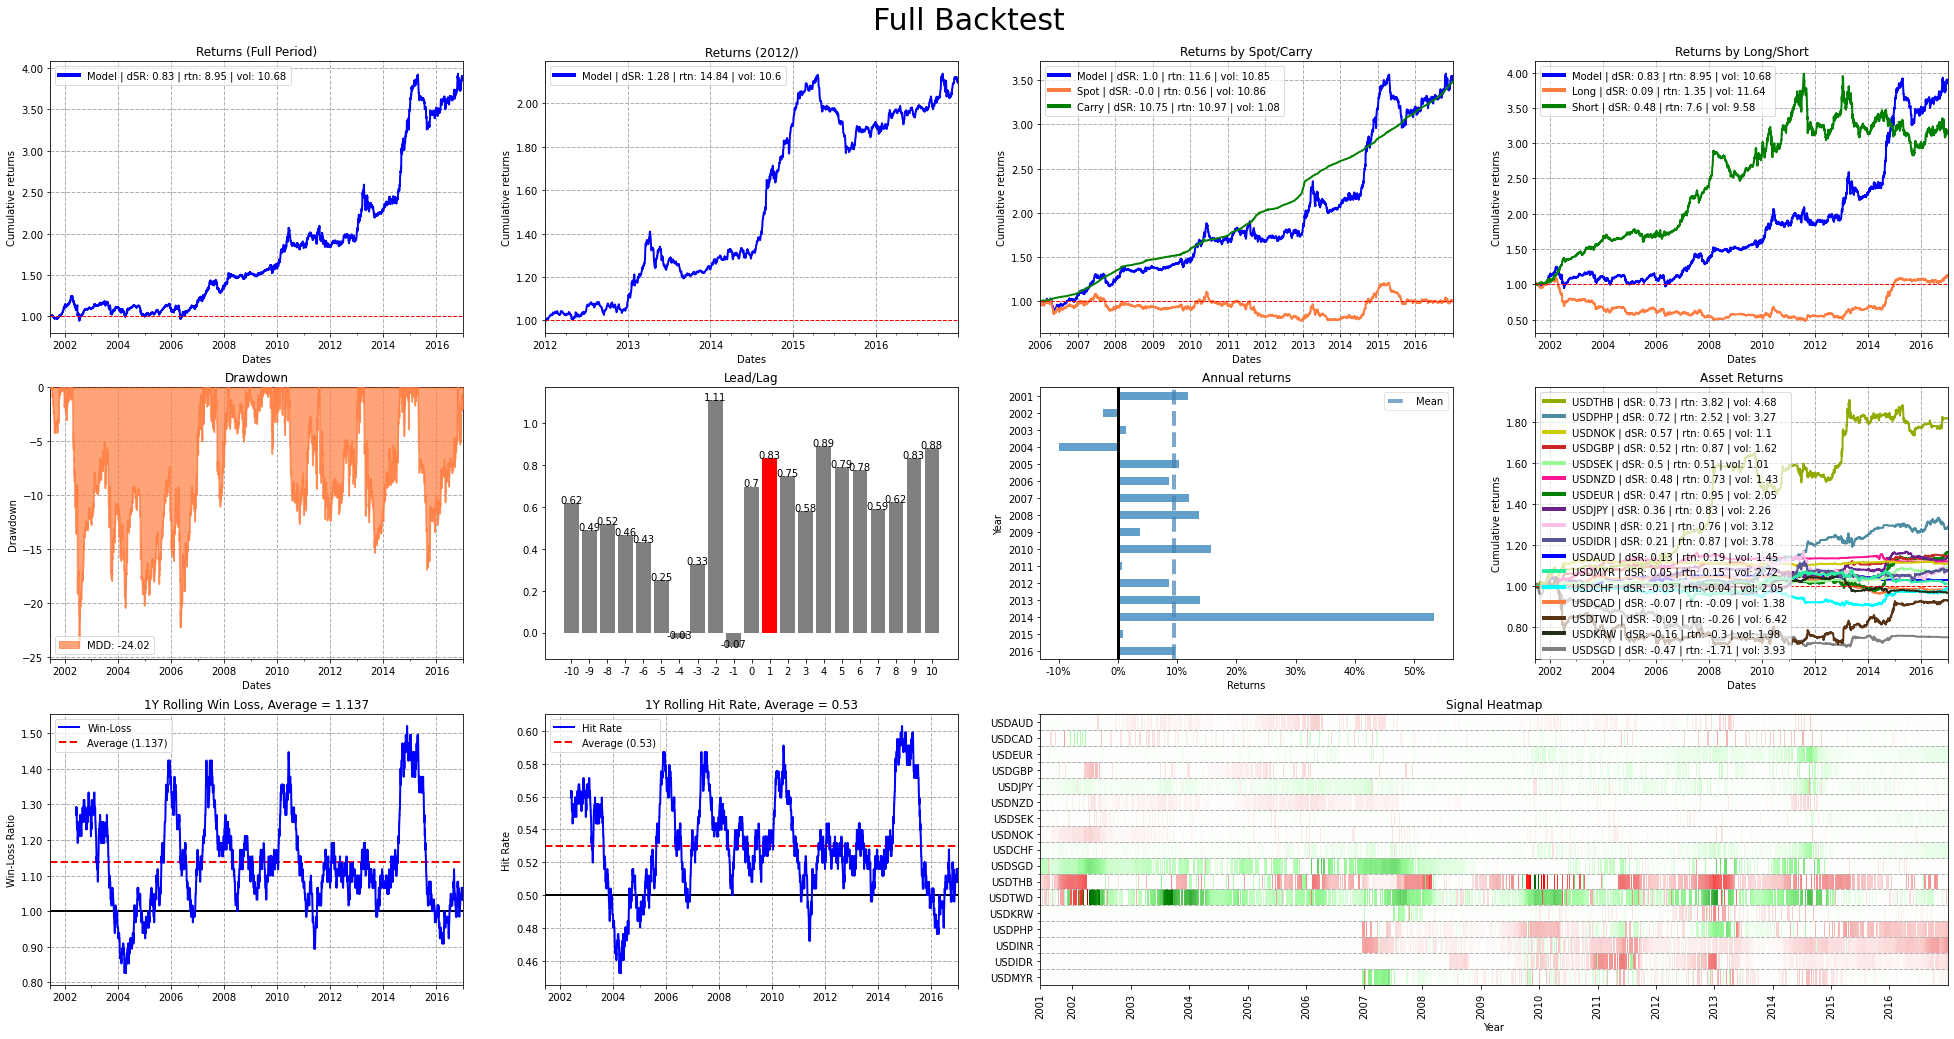

In [7]:
daily_bt = Backtest(signal = sig, 
                    asset_returns = total_returns, 
                    tcost = abs(total_returns*0), 
                    settings = settings,
                    settings_inject={"use_cov":False})
daily_bt.run()
get_summary(daily_bt)
plot_bt(daily_bt)

In [32]:
# gen_signal(daily_bt, main = "Turnover: " + str(round(np.mean(abs(daily_bt.pos_chg).sum(axis=1)) * 252,2)))

# Backtest Weekly Rebal

In [12]:
weekly_bt = Backtest(signal = sig, 
             asset_returns = total_returns, 
             tcost = abs(total_returns*0), 
             settings = settings,
             settings_inject = {"rebalance_period":"friday", "use_cov":False})
weekly_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [13]:
get_summary(weekly_bt)

Returns   : 0.09840333144629582
Vol       : 0.10745405698774789
SR        : 0.9157712068285699
Max DD    : -30.49

C Returns : 0.097030040571277
C SR      : 0.920073508418437
C Max DD  : -26.87

Hit rate  : 0.533
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.14


In [14]:
get_returns_stats(weekly_bt.asset_rtn, weekly_bt.wts)

,USDAUD,USDCAD,USDEUR,USDGBP,USDJPY,USDNZD,USDSEK,USDNOK,USDCHF,USDSGD,USDTHB,USDTWD,USDKRW,USDPHP,USDINR,USDIDR,USDMYR
annualized_return,0.199272,0.444706,1.069724,1.282273,0.248897,0.484755,0.397263,0.651842,0.473428,-1.623676,4.118212,0.186056,0.496032,1.742634,1.267482,0.642622,-0.956625
sharpe,0.140483,0.394435,0.508356,0.741957,0.106462,0.345661,0.400429,0.527063,0.190902,-0.414212,0.91318,0.028953,0.241727,0.524808,0.402021,0.151644,-0.345361
dollar_sharpe,0.135038,0.381701,0.520233,0.722252,0.09627,0.337778,0.397896,0.500601,0.176144,-0.427867,0.840102,-0.003999,0.231356,0.479412,0.364153,0.132395,-0.359301
trade_sharpe,0.378717,0.963543,0.86057,1.165003,0.283532,0.676497,0.621734,0.91597,0.115656,-0.614412,1.333156,-0.082157,0.637316,0.525393,0.447485,0.107426,-0.281349
long_sharpe,-2.151243,1.261572,0.86057,0.796976,0.564586,3.006155,0.93027,-3.992802,0.157704,-0.559991,0.210616,-0.12011,1.340987,1.120097,1.392425,-1.823307,-0.294355
short_sharpe,0.403844,0.863239,NaN,1.884182,-1.75675,0.624514,0.417786,0.948992,0.037072,-2.135395,1.451352,0.342098,0.343971,0.327775,0.329303,0.151707,-0.273859
sortino,0.051105,0.106604,0.276595,0.348168,0.056786,0.137744,0.151959,0.198961,0.073538,-0.211495,0.477449,0.014769,0.08742,0.265786,0.250609,0.073514,-0.163415
max_drawdown,-3.212258,-3.140153,-5.155862,-3.149318,-8.147183,-5.663667,-3.508197,-4.724518,-5.636923,-35.127262,-9.218331,-41.042834,-6.555602,-4.99394,-7.737023,-7.054314,-11.261354
max_drawdown_start,2007-04-18,2007-07-19,2012-07-24,2013-07-09,2002-01-31,2005-12-05,2005-06-27,2013-01-14,2015-01-13,2002-03-26,2005-09-12,2002-03-07,2013-01-18,2016-06-08,2011-08-01,2008-08-05,2011-05-05
max_drawdown_end,2010-05-20,2009-01-28,2014-03-18,2014-07-04,2004-01-22,2006-03-28,2007-08-16,2016-06-27,2016-11-04,2014-07-23,2006-02-22,2010-12-31,2013-08-01,2016-11-24,2013-09-03,2010-05-06,2016-11-29


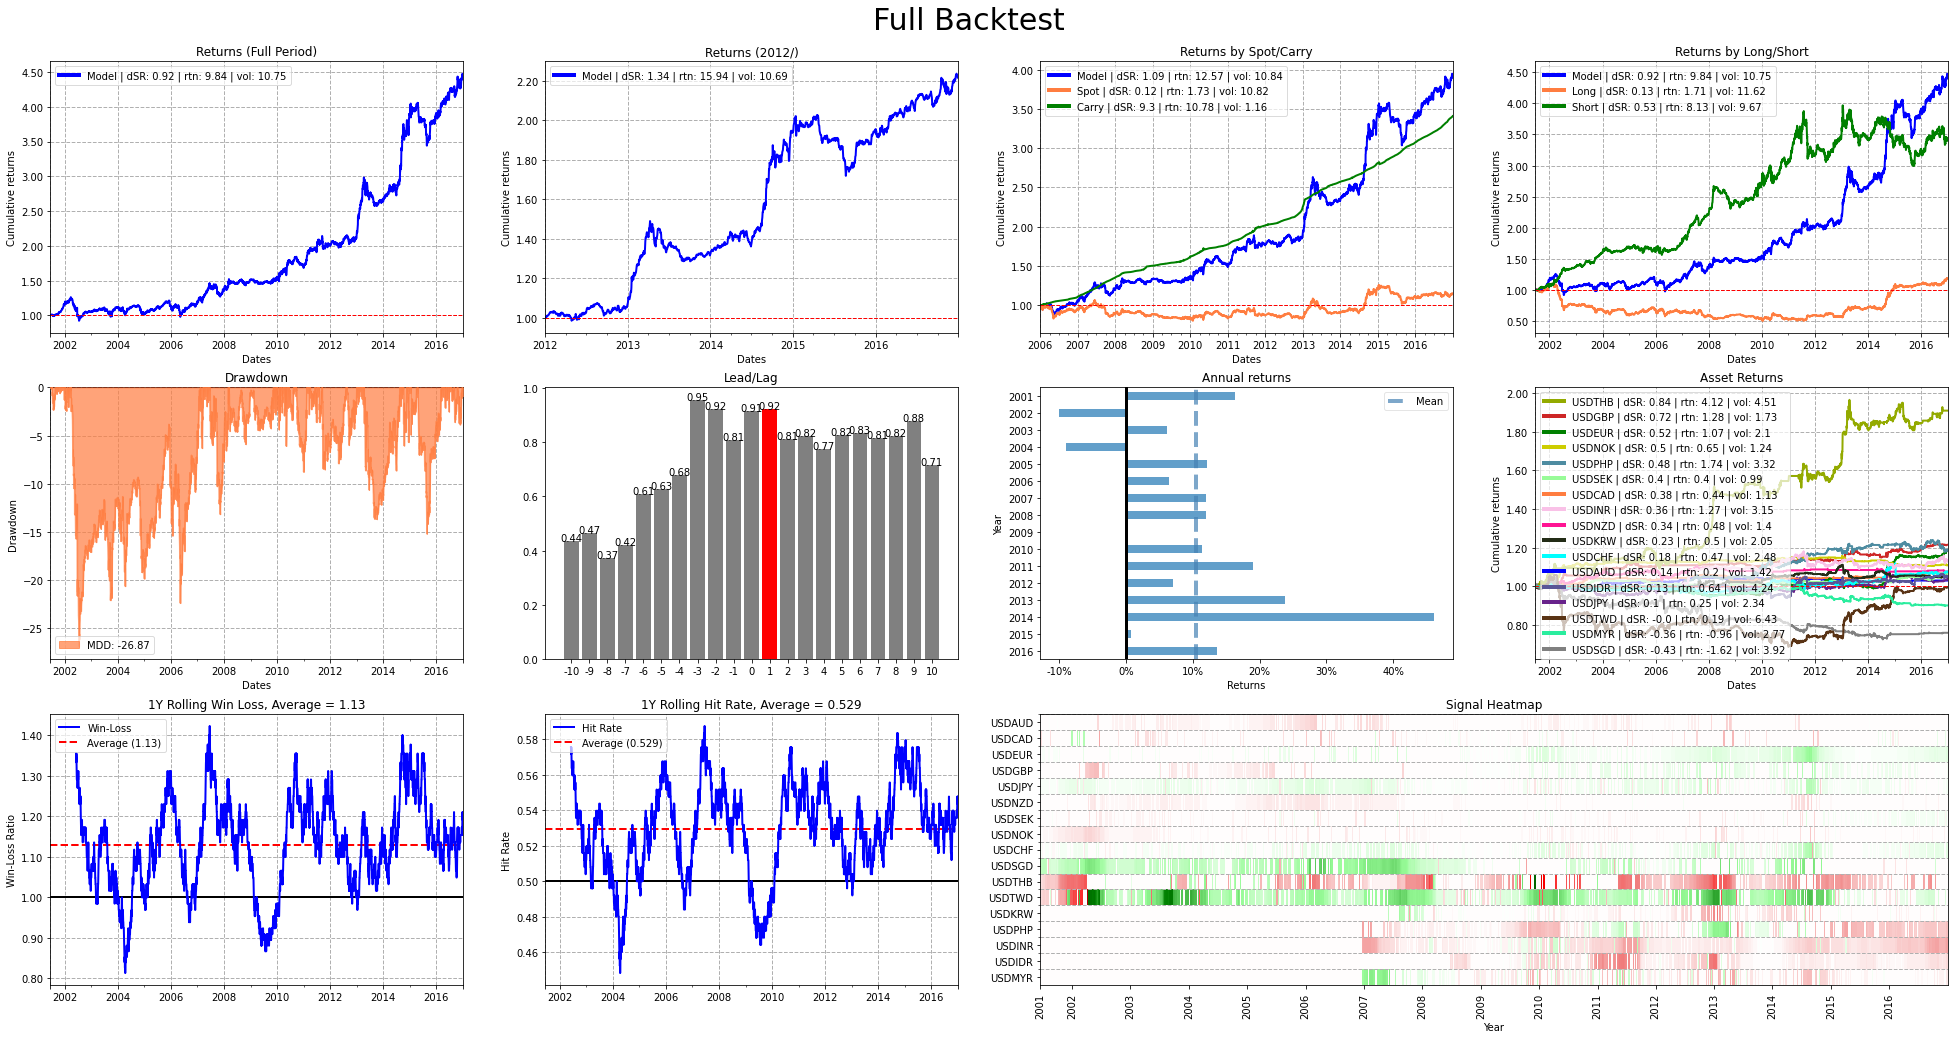

In [15]:
plot_bt(weekly_bt)

In [16]:
daily_bt.model_rtn.skew()

-0.4339135199221152

# Daily vs Weekly 

<AxesSubplot:title={'center':'Daily vs Weekly Rebal'}, xlabel='Dates', ylabel='Cumulative returns'>

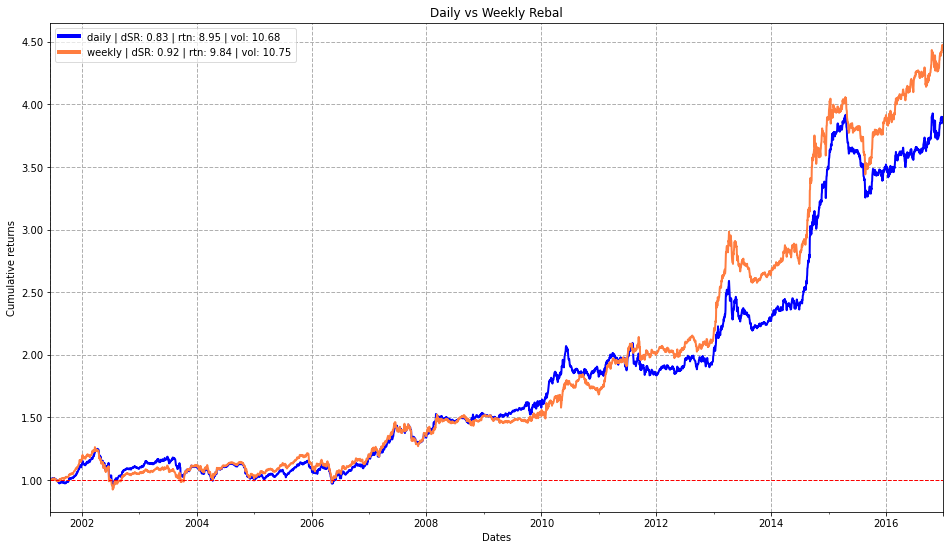

In [17]:
gen_plot_rtn(pd.concat([daily_bt.model_rtn.rename("daily"), weekly_bt.model_rtn.rename("weekly")], axis=1), main = "Daily vs Weekly Rebal")

In [18]:
# pickle.dump(daily_bt, open("../BT/carry_tovol_all_daily.p", "wb"))
# daily_bt = pickle.load(open("../BT/carry_tovol_all_daily.p", "rb"))

# pickle.dump(daily_bt_cov, open("../BT/carry_tovol_all_cov_daily.p", "wb"))
# daily_bt_cov = pickle.load(open("../BT/carry_tovol_all_cov_daily.p", "rb"))

# pickle.dump(weekly_bt, open("../BT/carry_tovol_all_weekly.p", "wb"))
# weekly_bt = pickle.load(open("../BT/carry_tovol_all_weekly.p", "rb"))

# Regime Plot

### 1. GFC 

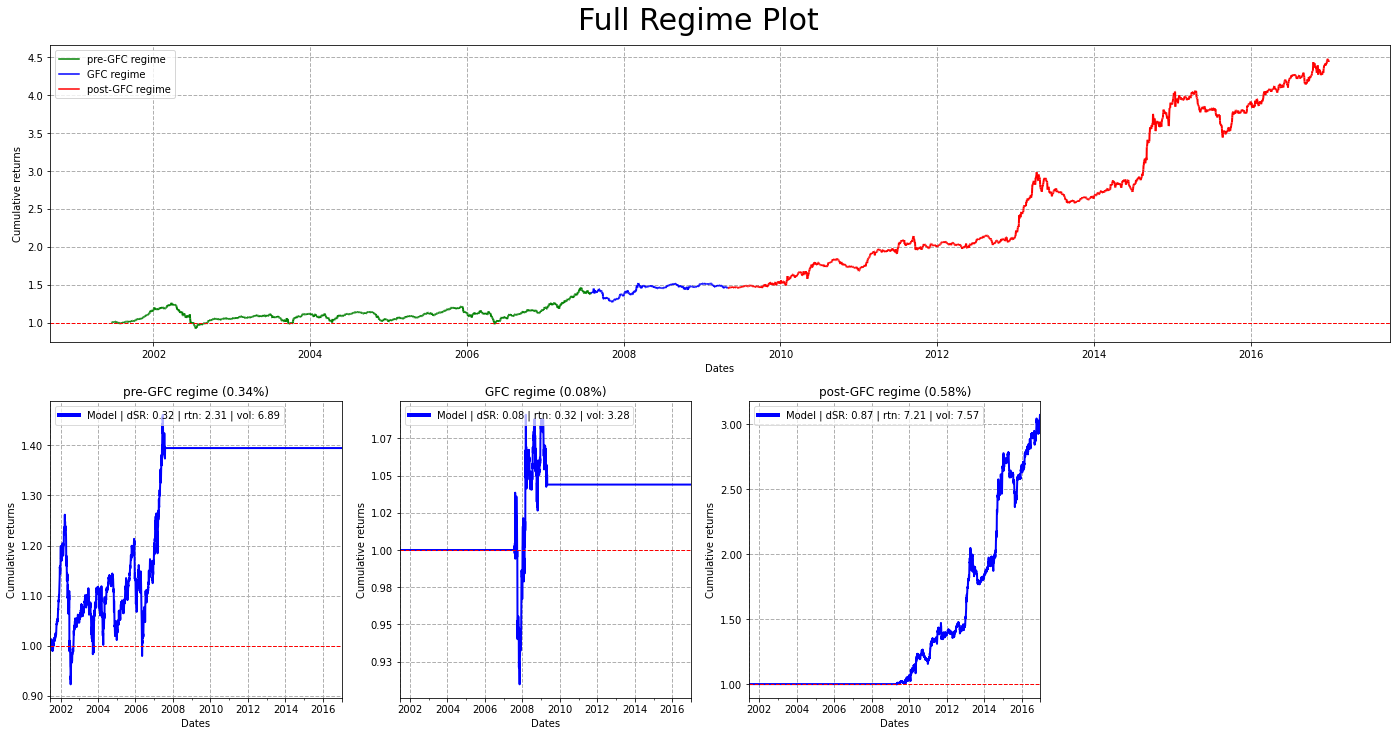

In [19]:
full_regime_plot(weekly_bt, gfc_regime)

### 2. Rates regime

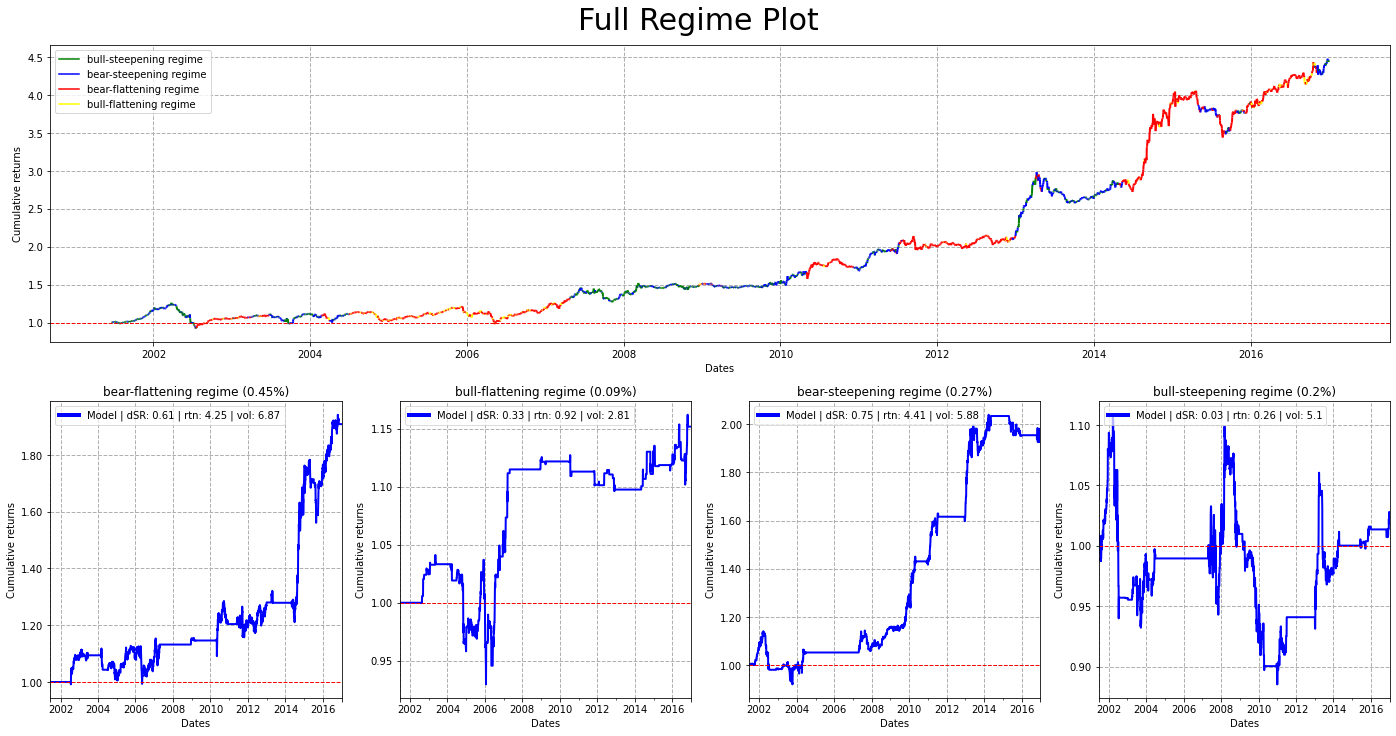

In [20]:
full_regime_plot(weekly_bt, rates_regime)

### 3. Volatility cycle

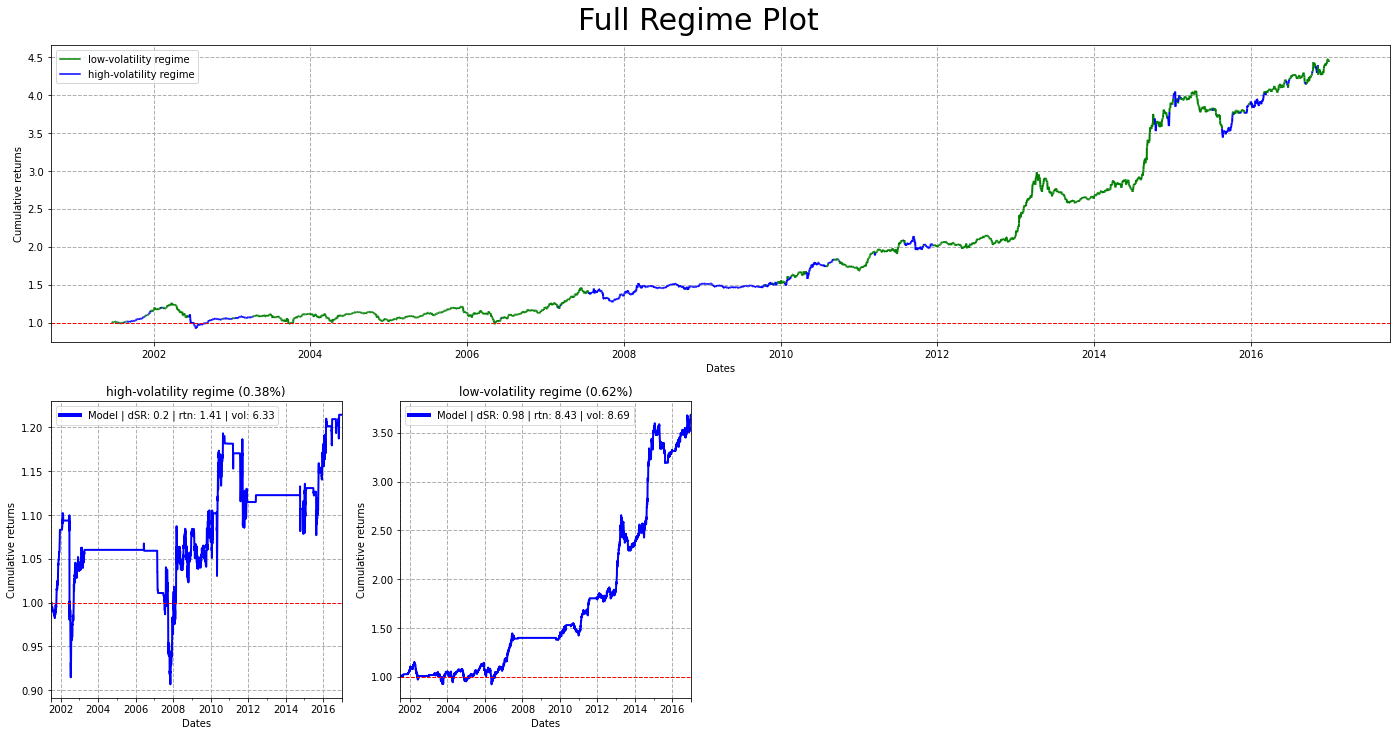

In [21]:
full_regime_plot(weekly_bt, vol_regime)

### 4. Economic cycle

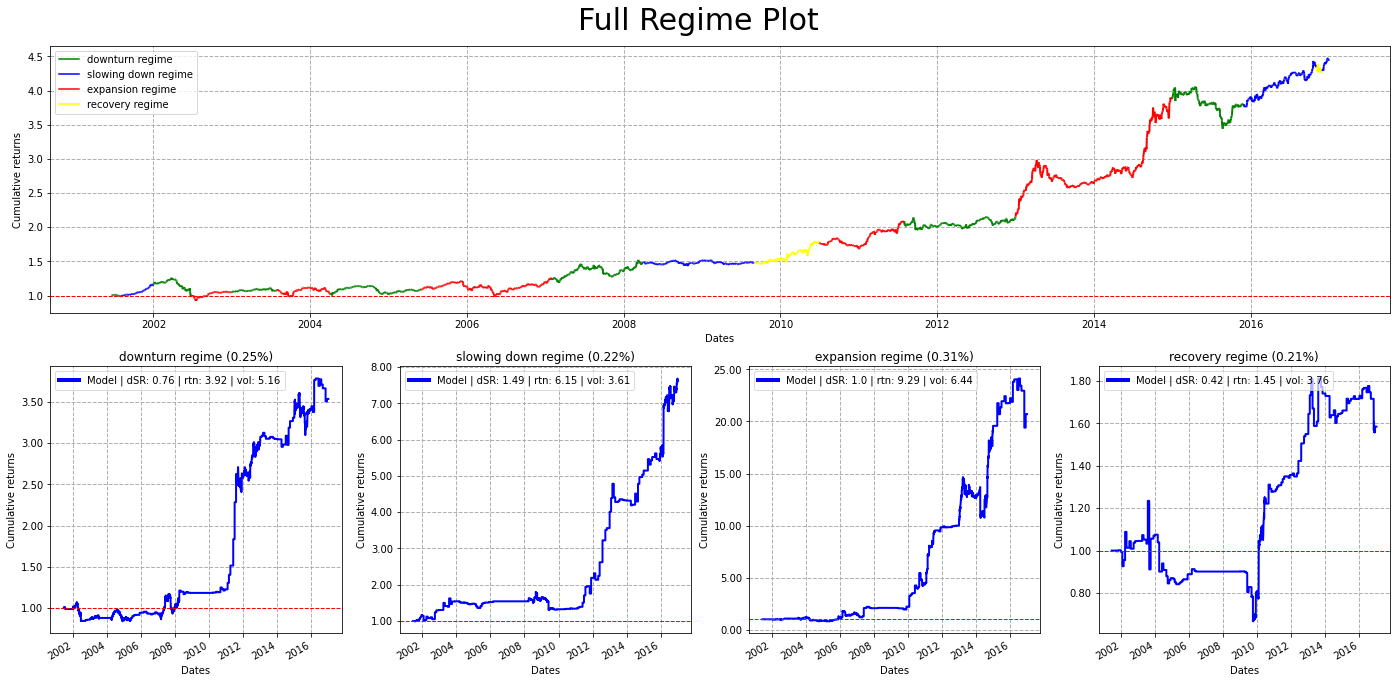

In [22]:
full_regime_plot(weekly_bt, cycle_regime)

### 5. Economic framework

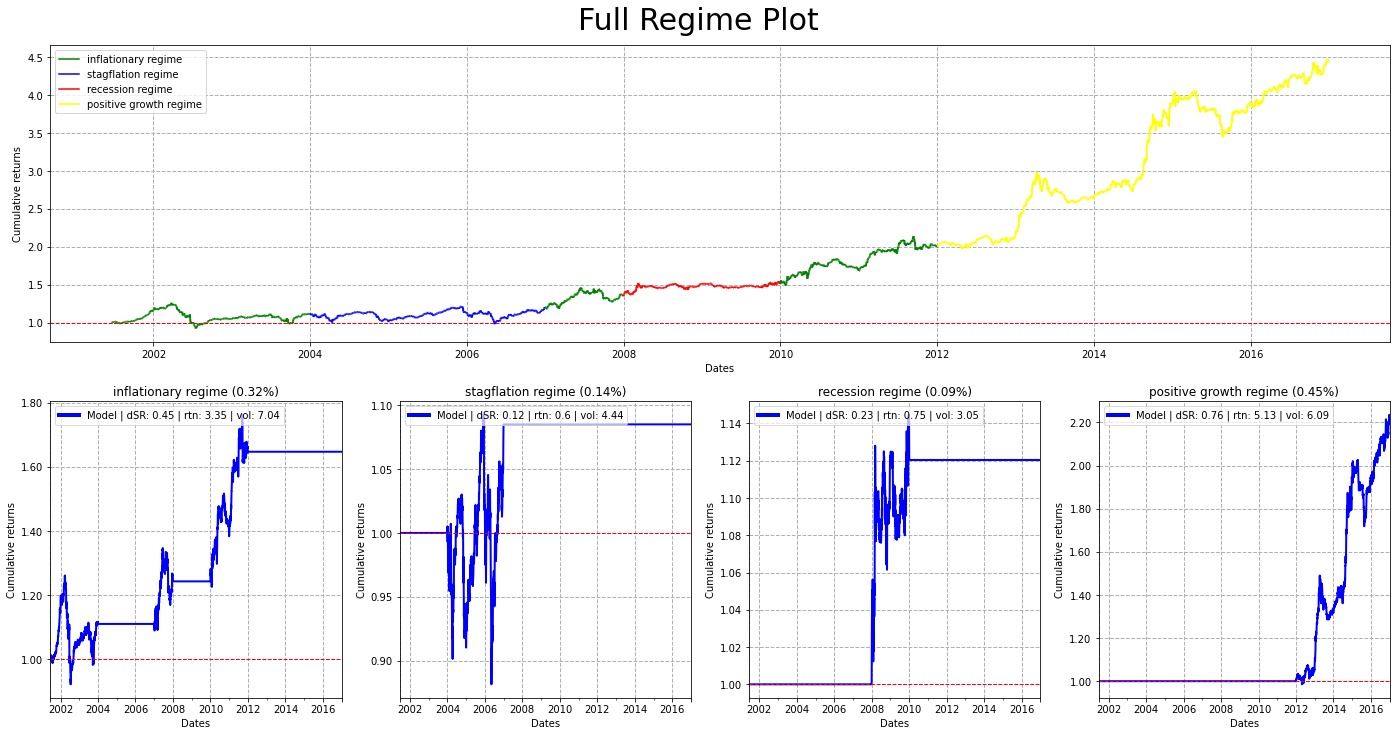

In [23]:
full_regime_plot(weekly_bt, macro_regime)

## Sensitivity Analysis

In [53]:
def signal_generation(x,y):
    num = carry_returns.pipe(fill_date, True) ### historical returns from carry
    denom = spot_returns.pipe(fill_date, True).pipe(rolling_vol, x) ### volatility of spot returns
    signal = (num/denom).pipe(omit_leading_na, "any").pipe(high_minus_low)
    sig = signal * (1/spot_returns.pipe(fill_date, True).pipe(rolling_vol, y)) ### magnitude is 1/vol
    return sig

In [54]:
signalsa = [signal_generation(x,y) for x in [21, 21*3, 21*6 , 252, 252*3, 252*5] for y in [21, 21*3, 21*6 , 252, 252*3, 252*5]]

In [55]:
bts = [Backtest(signal = sen_sig, 
                 asset_returns = total_returns, 
                 tcost = abs(total_returns*0), 
                 settings = settings) for sen_sig in signalsa]
for bt in bts:
  bt.run()

Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Re-arranging asset columns
Asset scaling ...
Portfolio 

In [70]:
names = [x+"-"+y for x in ["1mo", "3mo", "6mo", "1y", "3y", "5y"] for y in ["1mo", "3mo", "6mo", "1y", "3y", "5y"]]
cat = pd.concat([x.model_rtn for x in bts], axis=1)
cat.columns = names
# gen_plot_rtn(cat)

In [71]:
arr = np.zeros(shape=(6,6))

In [78]:
counter = 0
for i in range(6):
  for j in range(6):
    arr[i,j] = dollar_sharpe(cat.iloc[:,counter])
    counter += 1

In [79]:
sns_table = pd.DataFrame(arr)
sns_table.columns = ["1mo", "3mo", "6mo", "1y", "3y", "5y"]
sns_table.index = ["1mo", "3mo", "6mo", "1y", "3y", "5y"]


In [81]:
sns_table

,1mo,3mo,6mo,1y,3y,5y
1mo,0.697038,0.799984,0.824721,0.745439,0.746221,0.538332
3mo,0.642771,0.790303,0.834421,0.769742,0.751862,0.593971
6mo,0.677993,0.818314,0.859593,0.788699,0.786834,0.609900
1y,0.740381,0.882614,0.934419,0.864757,0.844069,0.703378
3y,0.745270,0.889659,0.932550,0.823060,0.797393,0.650065
5y,0.890548,1.031026,1.049752,0.935626,0.855929,0.809833


Text(123.0, 0.5, 'Vol1 lookback')

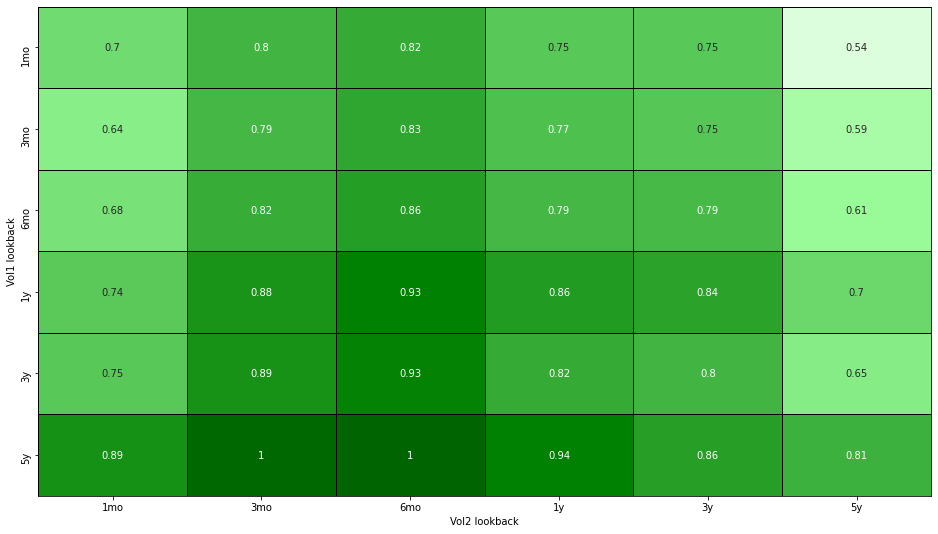

In [84]:
ax = plt.gca()
res = sns.heatmap(sns_table, annot=True, linewidths=1, linecolor="black",
              alpha=1.0,
              center=0.5,
              cbar=False,
              cmap=RdGn,
              ax=ax)
for _, spine in res.spines.items():
  spine.set_visible(True)
  
ax.set_xlabel('Vol2 lookback')
ax.set_ylabel("Vol1 lookback")